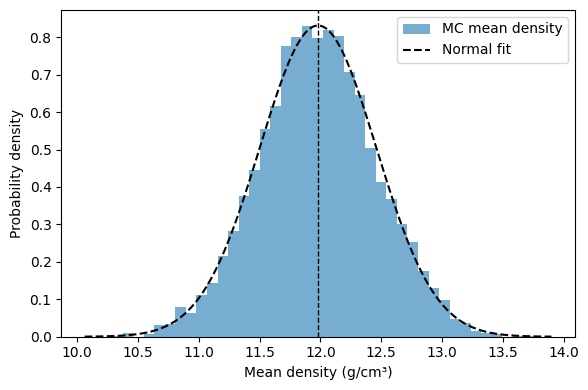

Per-sample densities (g/cm^3): [12.112 12.28  11.946 12.112 12.28  11.102]
Per-sample 1σ uncertainty (g/cm^3): [1.2115 1.2284 1.195  1.2115 1.2284 1.0096]
Mean density = 11.9807 ± 0.4799 g/cm^3 (1σ, from MC of the mean)


In [7]:

# changed code
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# instrument resolutions (do not reuse variable names)
res_caliper = 0.01     # mm (vernier)
res_micrometer = 0.001 # mm (micrometer)
dm = 0.1               # g, assumed mass uncertainty (adjust if known)

# raw measurements (diameter measured with caliper, height measured with micrometer)
diameters = np.array([14.5, 14.4, 14.6, 14.5, 14.4, 14.5, 14.5, 14.5, 14.5, 14.5])  # mm
heights = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.6])                                # mm (micrometer)
masses = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.1])                                  # g

# use matching length for per-sample densities
n = min(len(masses), len(heights), len(diameters))
d = diameters[:n]
h = heights[:n]
m = masses[:n]

# compute volumes (mm^3) and convert to cm^3 (1 mm^3 = 1e-3 cm^3)
area_mm2 = np.pi * d**2 / 4.0          # mm^2
vol_mm3 = area_mm2 * h                 # mm^3
vol_cm3 = vol_mm3 * 1e-3               # cm^3

# per-sample densities (g/cm^3)
densities = m / vol_cm3

# analytic propagation (relative)
rel_uncert_V = np.sqrt((2 * res_caliper / d)**2 + (res_micrometer / h)**2)  # relative V uncertainty
rel_uncert_m = dm / m                                                        # relative mass uncertainty
rel_uncert_D = np.sqrt(rel_uncert_m**2 + rel_uncert_V**2)
sigma_D_per_sample = densities * rel_uncert_D

# Monte Carlo for distribution of the mean density (helps visualize uncertainty properly)
Nsim = 5000
mean_density_sim = np.empty(Nsim)
for i in range(Nsim):
    m_sim = np.random.normal(m, dm)                      # sample masses
    d_sim = np.random.normal(d, res_caliper)            # sample diameters
    h_sim = np.random.normal(h, res_micrometer)         # sample heights
    vol_sim_cm3 = (np.pi * d_sim**2 / 4.0 * h_sim) * 1e-3
    dens_sim = m_sim / vol_sim_cm3
    mean_density_sim[i] = np.mean(dens_sim)

# plot Monte Carlo distribution of the mean density
D_mean = mean_density_sim.mean()
D_std = mean_density_sim.std(ddof=1)

plt.figure(figsize=(6,4))
plt.hist(mean_density_sim, bins=40, density=True, alpha=0.6, label='MC mean density')
x = np.linspace(D_mean - 4*D_std, D_mean + 4*D_std, 300)
plt.plot(x, norm.pdf(x, D_mean, D_std), 'k--', label='Normal fit')
plt.axvline(D_mean, color='k', linestyle='--', linewidth=1)
plt.xlabel('Mean density (g/cm³)')
plt.ylabel('Probability density')
plt.legend()
plt.tight_layout()
plt.show()

# print summary
print(f"Per-sample densities (g/cm^3): {np.round(densities,3)}")
print(f"Per-sample 1σ uncertainty (g/cm^3): {np.round(sigma_D_per_sample,4)}")
print(f"Mean density = {D_mean:.4f} ± {D_std:.4f} g/cm^3 (1σ, from MC of the mean)")
# ...existing code...